## Визуализация с помощью Pandas

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Датасет - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [2]:
df = pd.read_csv('files/heart.csv', sep=',')

In [3]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Реализация функции plot в pandas основана на библиотеке matplotlib.

In [6]:
df['Cholesterol'] = np.where(df['Cholesterol'] == 0, np.nan, df['Cholesterol'])
df['RestingBP'] = np.where(df['RestingBP'] == 0, np.nan, df['RestingBP'])
df['FastingBS'] = np.where(df['FastingBS'] == 0, np.nan, df['FastingBS'])

### Одномерные данные

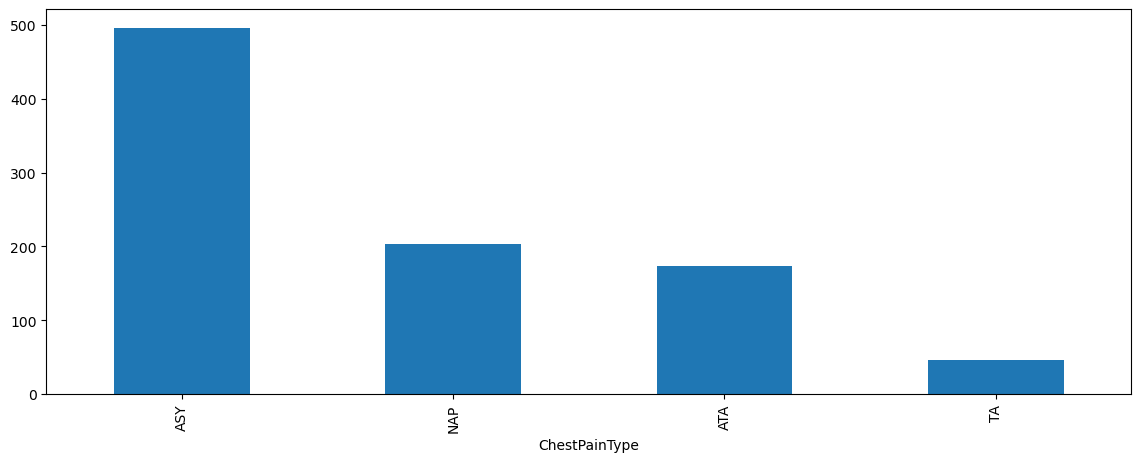

In [7]:
fig = plt.figure(figsize=(14, 5))
df['ChestPainType'].value_counts().plot.bar()
# Bar Chart (столбчатая диаграмма) - классический инструмент для отображения информаци по категориям
plt.show()

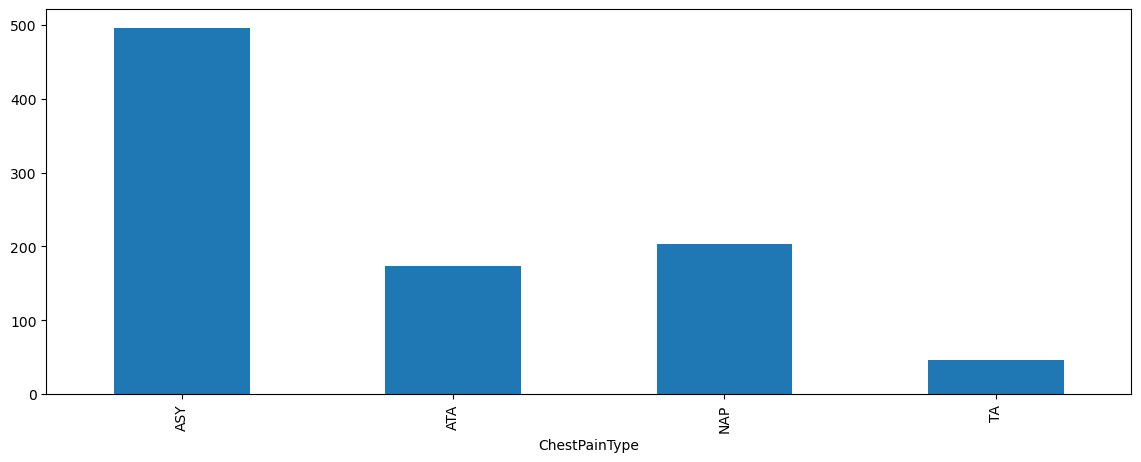

In [8]:
fig = plt.figure(figsize=(14, 5))
df['ChestPainType'].value_counts().sort_index().plot.bar()
plt.show()

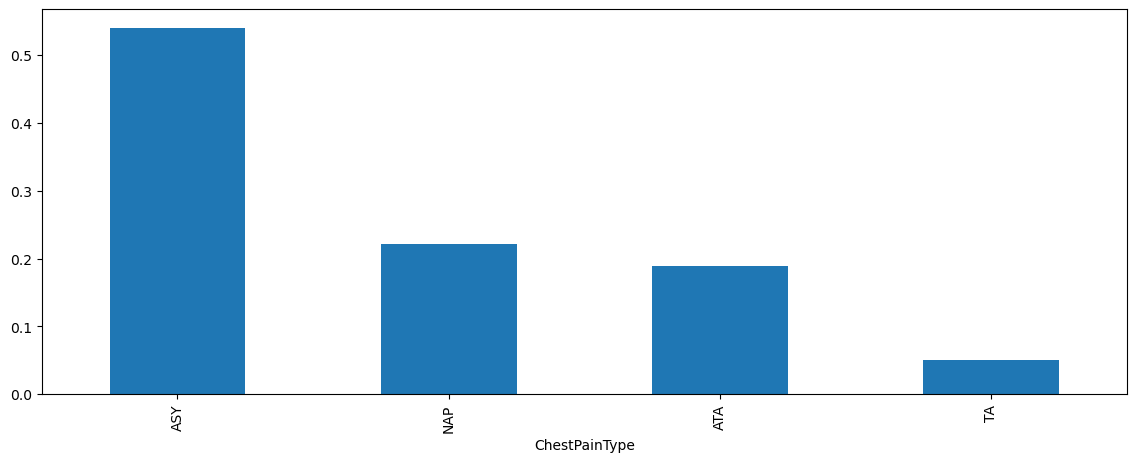

In [9]:
# Можно посмотреть относительные наблюдения
fig = plt.figure(figsize=(14, 5))
(df['ChestPainType'].value_counts() / len(df)).plot.bar()
plt.show()

In [10]:
df.groupby(['HeartDisease'])[['Age', 'Cholesterol']].mean()

,Age,Cholesterol
HeartDisease,,
0,50.551220,238.769231
1,55.899606,251.061798


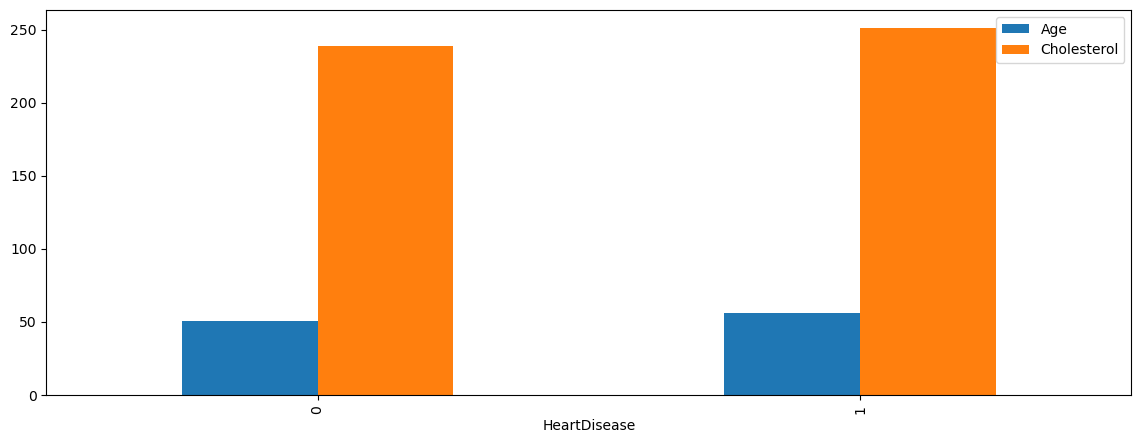

In [11]:
df.groupby(['HeartDisease'])[['Age', 'Cholesterol']].mean().plot.bar(figsize=(14, 5), stacked=False)
plt.show()

In [12]:
df['Cholesterol_bin'] = df['Cholesterol'] // 10 * 10

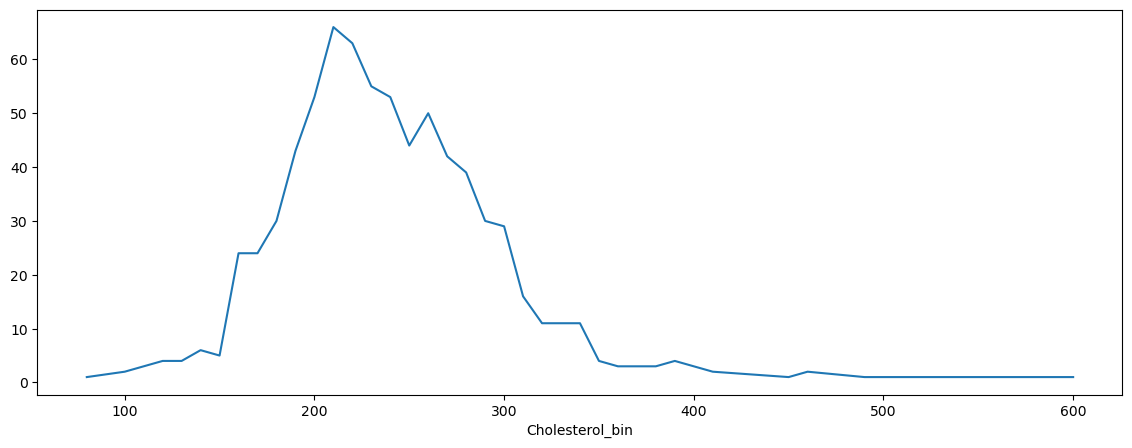

In [13]:
# Используется при большом количестве вариантов категориальной переменной (более 20 значений)
fig = plt.figure(figsize=(14, 5))
chart = df['Cholesterol_bin'].value_counts().sort_index().plot.line()
plt.show()

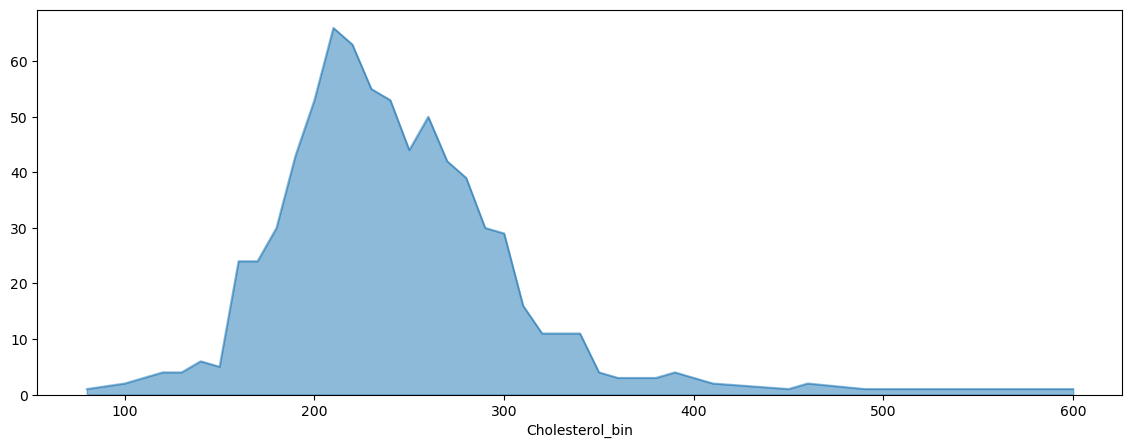

In [14]:
fig = plt.figure(figsize=(14, 5))
chart = df['Cholesterol_bin'].value_counts().sort_index().plot.area(alpha=0.5)

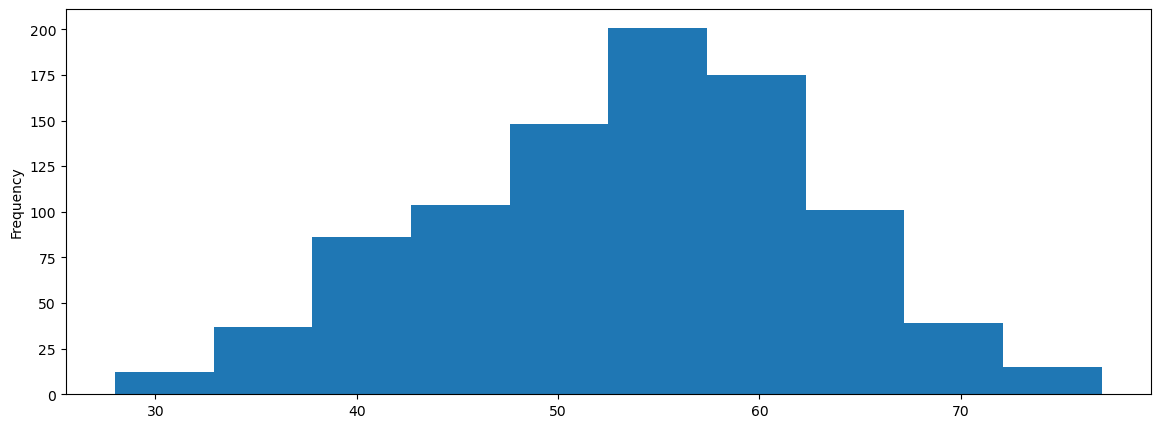

In [15]:
fig = plt.figure(figsize=(14, 5))
df['Age'].plot.hist(bins=10)
# Гистограмма - классический инструмент для визуализации интегральных данных
# Визуально похожа на столбчатую диаграмму, гистограмма разбивает данные на равные интервалы и рисует частоты в каждом из столбцов
plt.show()

<Axes: ylabel='Frequency'>

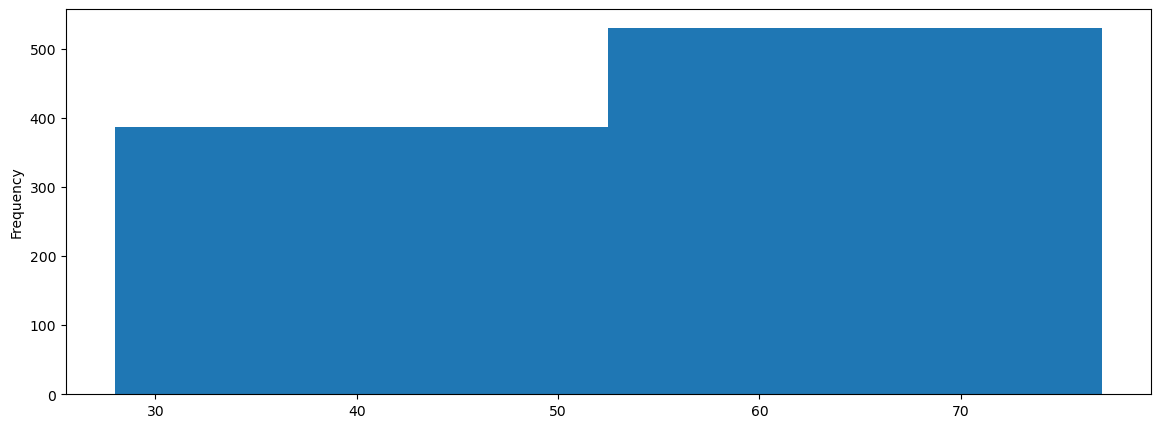

In [16]:
fig = plt.figure(figsize=(14, 5))
df['Age'].plot.hist(bins=2)
# параметр bins

### Двумерные данные

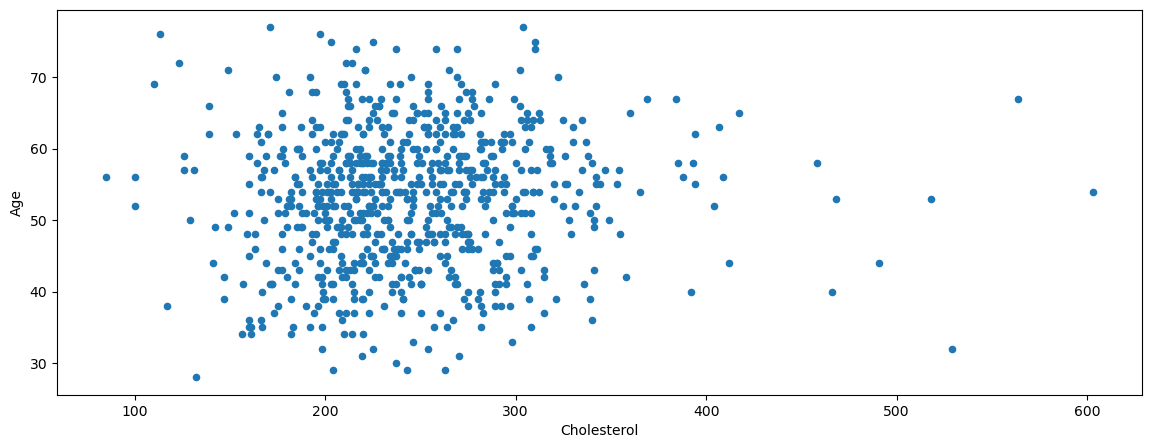

In [17]:
df.plot.scatter(x='Cholesterol', y='Age', figsize=(14, 5))
# Используется для того, чтобы показать зависимость одного показателя от другого
plt.show()

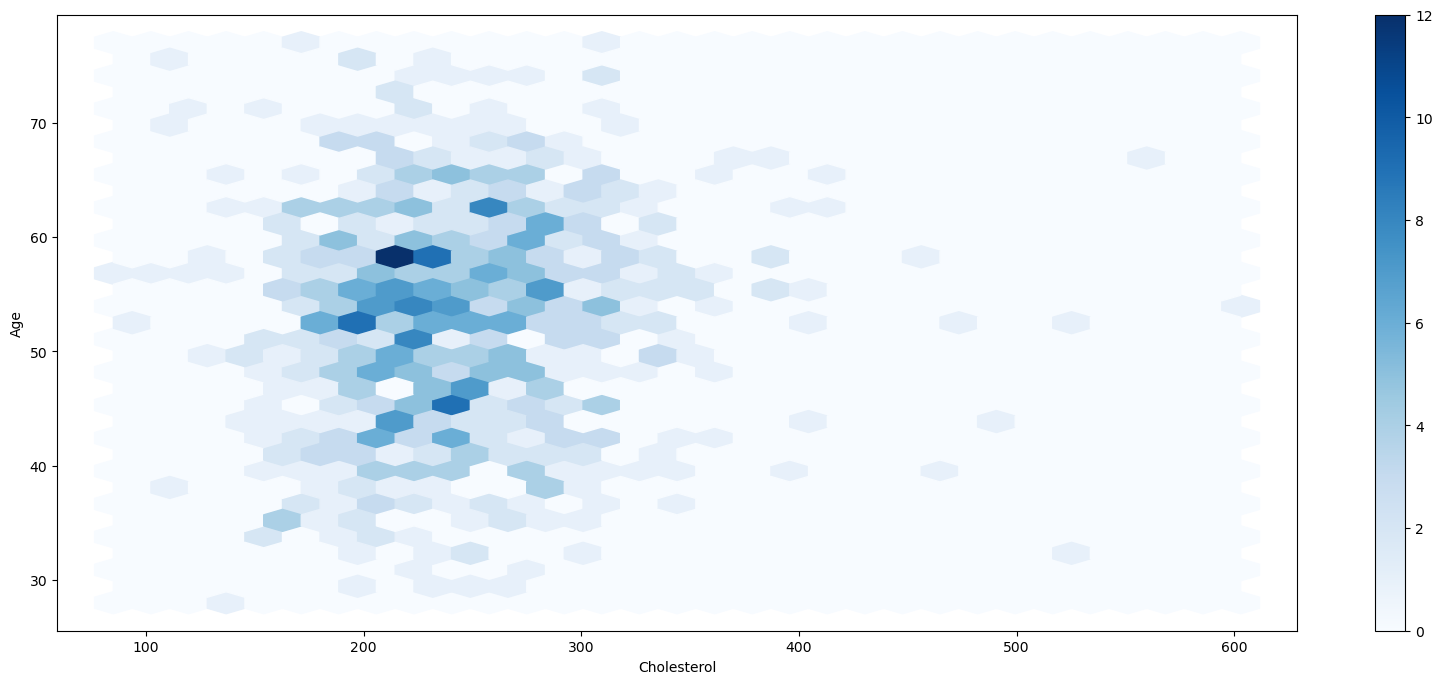

In [18]:
df.plot.hexbin(x='Cholesterol', y='Age', figsize=(20, 8), gridsize=30,
               cmap='Blues')
plt.show()